# Ejercicio clasificación con SVM

1. Carga el conjunto de "California Housing" que puedes encontrar en https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv. La variable que vamos a predecir es "median_house_value"

In [ ]:
from functools import total_ordering
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

df[df["total_bedrooms"].isna()].index

df.drop(df[df["total_bedrooms"].isna()].index, axis= 0, inplace= True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Lo primero que haremos es clasificar las casas por precio: muy alto, alto, medio, bajo y muy bajo. Para ello deberás convertir en categórica la columna "median_house_value". Esto lo haremos para que el problema se transforme en un problema de clasificación y no de regresión. Recuerda borrar la columna "median_house_value" con los valores numéricos.

In [ ]:
min_value= df['median_house_value'].min()
max_value= df['median_house_value'].max()

labels = ['muy bajo', 'bajo', 'medio', 'alto', 'muy alto']
bins = np.linspace(min_value,max_value,6)

df.info()
df['median_house_value_new'] = pd.cut(df['median_house_value'],
                                       bins=bins,
                                       labels=labels,
                                       include_lowest=True)

df = df.drop('median_house_value', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   longitude               20433 non-null 

Divide el dataset para guardar un 10% a validación

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='median_house_value_new', axis=1)
y = df['median_house_value_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Ejercicio 1
 Implementa los transformadores que consideres para realizar el preprocesamiento de los datos.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class Transformador1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.numeric_columns = list(X.dtypes[X.dtypes != 'object'].index)
        return self

    def transform(self, X):
        return X[self.numeric_columns]



# Ejercicio 2

Crea el pipeline necesario para realizar el preprocesamiento de los datos y el entrenamiento del modelo utilizando arboles de decisión.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline_with_transformer = Pipeline([
    ('transformador1', Transformador1()),
    ('scaler', StandardScaler()),
    #('decisiontree', DecisionTreeClassifier(max_depth=3, random_state=42))
    ('knn', KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto'))
])

pipeline_with_transformer.fit(X_train, y_train)



Pipeline(steps=[('transformador1', Transformador1()),
                ('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Ejercicio 3

Prueba con diferentes hipeparámetros evaluando los modelos resultantes a través de la técnica de cross validation y seleccionando el que mejor exactitud tenga.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_with_transformer, X_train, y_train, cv=k_fold, scoring='accuracy')
print(scores.mean())

0.6180880428476592


In [ ]:
#0.619886084256795

# Ejercicio 4

Muestra la matriz de confusión que ofrece el pipeline que mejor exactitud tenga, para ello utiliza el subconjunto de datos para validación que has guardado al principio.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


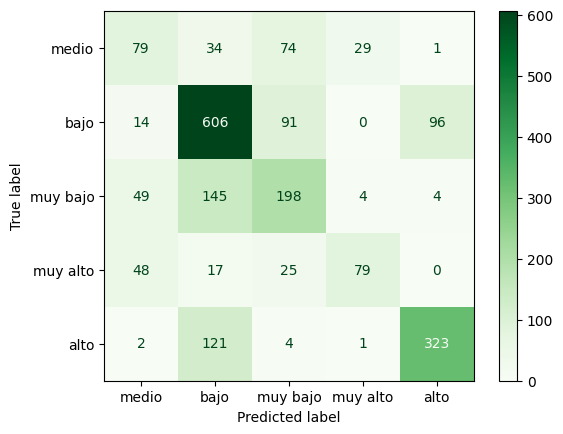

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


#classifier = DecisionTreeClassifier(max_depth=8, random_state=42).fit(X_train, y_train)
class_names = y_test.unique()
disp = ConfusionMatrixDisplay.from_estimator(
      pipeline_with_transformer,
      X_test,
      y_test,
      display_labels=class_names,
      cmap=plt.cm.Greens
)


plt.show()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(url)
t1 = Transformador1()
X_train = t1.fit_transform(X_train)

rs = np.random.RandomState(0)

corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924634,-0.106450,0.039876,0.064498,0.093946,0.051307,-0.016087
latitude,-0.924634,1.000000,0.010197,-0.032485,-0.063435,-0.104336,-0.067952,-0.078666
housing_median_age,-0.106450,0.010197,1.000000,-0.359712,-0.319423,-0.292964,-0.301625,-0.120034
total_rooms,0.039876,-0.032485,-0.359712,1.000000,0.929569,0.854261,0.917716,0.199610
total_bedrooms,0.064498,-0.063435,-0.319423,0.929569,1.000000,0.875414,0.979367,-0.007003
population,0.093946,-0.104336,-0.292964,0.854261,0.875414,1.000000,0.905296,0.004999
households,0.051307,-0.067952,-0.301625,0.917716,0.979367,0.905296,1.000000,0.013913
median_income,-0.016087,-0.078666,-0.120034,0.199610,-0.007003,0.004999,0.013913,1.000000


# Ejercicio 5

Siguiendo los mismos pasos crea un modelo de regresión que permita predecir el precio medio de la vivienda. Para ello tendrás que utilizar el dataset con la columna "median_house_value" en forma numérica. Puedes descargarlo otra vez.